# Part I - (Ford GoBike System Data Exploration)
## by (Mutalib Ozigis)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
bike= pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print(bike.shape)
print(bike.dtypes)
bike.head()


(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [26]:
#convert wrong data types to the correct data type.
dates=['start_time','end_time']
for date in dates:
    bike[date]=pd.to_datetime(bike[date])

ids=['start_station_id','start_station_longitude','start_station_latitude','end_station_id','end_station_longitude','end_station_latitude','bike_id']
for id in ids:
    bike[id]=bike[id].astype('object')

categories=['member_gender','user_type','bike_share_for_all_trip']
for category in categories:
    bike[category]= bike[category].astype('category')
bike.bike_share_for_all_trip=(bike.bike_share_for_all_trip== 'Yes')


In [4]:
#check for null values and possibly remove them if they're not many, as there is no data that can be used to fill them 
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

there are 197 enteries without stations and 8265 enteries without gende or year of birth,  these enteries can be dropped.

In [8]:
bike.dropna(axis=0, inplace=True)
bike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
#check for duplicated enteries
bike.duplicated().sum()

0

In [40]:
#the age is not given but it can be calculated and saved into a new column called age by subracting the dtae of birth from 2022.

bike['age']= 2022-bike.member_birth_year

### What is the structure of your dataset?

> There are 183412 fordgobike rides in the dataset with 16 descriptive features of each ride such as duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip. Some of which have been converted to appropriate data types such as datetime and object as well as category.

### What is/are the main feature(s) of interest in your dataset?

> I am interested to see these if descriptive features such as age, location, sex can be used to give an idea of the length of usage of these bikes

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The demography of users of these bikes will help in the investigation

## Univariate Exploration:
This exploration gives an overall distribution of each variable in the datasets 
 


### 1. I'll start by answering the question"what was the distribution of the main variable of interest: Duration of trips"?

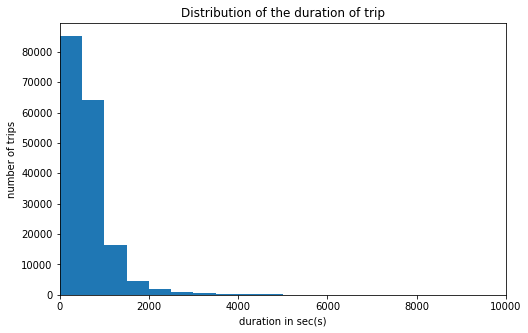

In [11]:
plt.figure(figsize=[8,5])
binsize=np.arange(0, bike['duration_sec'].max()+500,500)
plt.hist(data=bike, x='duration_sec', bins=binsize);
plt.xlabel("duration in sec(s)")
plt.ylabel("number of trips")
plt.title('Distribution of the duration of trip')
plt.xlim(0,10000);


The distribution of duration is skewed to the right with a right tailwith outliers at 2000 seconds to 4000 seconds, we investigate further by converting to a log scale

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


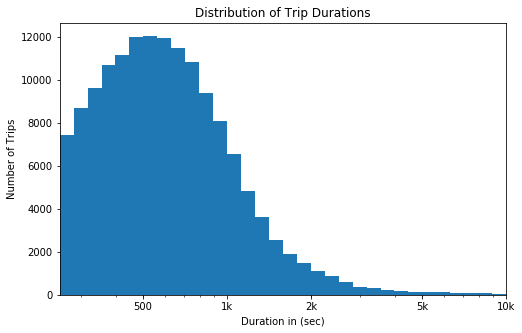

In [12]:
log_binsize = 0.05
log_bins = 10 ** np.arange(1.78, np.log10(bike['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.xlim(-500,10000);


From the Log scale, majority of the trips made lasted between 500-600 seconds,with very few trips lasting 2000 seconds and above.More trips were made as the duration of the trip was increased until it reached the maximum of 500-600 seconds from which fewer people could go beyond that length of trip.

### 2. check the distribution of the start and end stations to see which stations were the top 10 most popularly used and 10 least used?

In [13]:
# check the number of uniques start stations
bike.start_station_name.nunique()

329

based on this, there were 329 bike stations across san franciso bay

In [14]:
#top 10 most popular/used start stations
bike.start_station_name.value_counts().nlargest(10)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

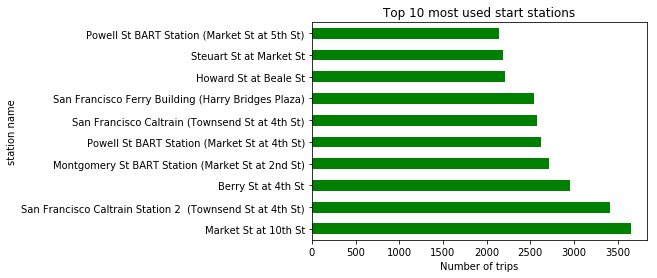

In [15]:
#plot an horizontal bar chart to show the top 10 used start stations so as not to have a clumsy x axes
bike.start_station_name.value_counts().nlargest(10).plot.barh(color='g');
plt.title('Top 10 most used start stations')
plt.xlabel('Number of trips')
plt.ylabel('station name');


In [16]:
# the least 10 used start stations
bike.start_station_name.value_counts().nsmallest(10)

16th St Depot                             2
Palm St at Willow St                      3
21st Ave at International Blvd            4
Parker Ave at McAllister St               7
Farnam St at Fruitvale Ave                9
Willow St at Vine St                      9
Taylor St at 9th St                      13
Leavenworth St at Broadway               16
23rd Ave at Foothill Blvd                17
Backesto Park (Jackson St at 13th St)    17
Name: start_station_name, dtype: int64

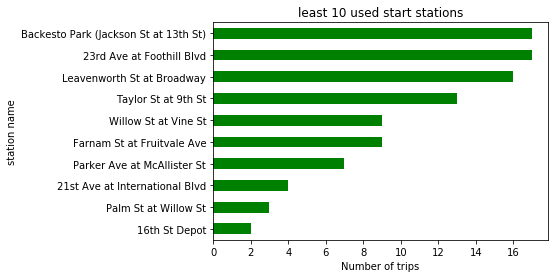

In [17]:
#plot an horizontal bar chart to show the least 10 used start stations so as not to have a clumsy x axis
bike.start_station_name.value_counts().nsmallest(10).plot.barh(color='g');
plt.title('least 10 used start stations')
plt.xlabel('Number of trips')
plt.ylabel('station name');


In [18]:
#number of unique end stations
bike.end_station_name.nunique()

329

There are 329 unique end stations

In [19]:
#top 10 most used end stations
bike.end_station_name.value_counts().nlargest(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

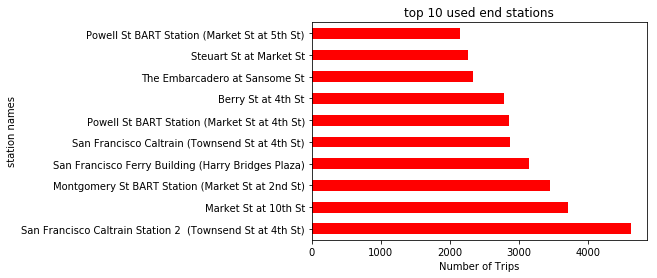

In [20]:
#plot a horizontal bar chart to visualize the top 10 most used end stations
bike.end_station_name.value_counts().nlargest(10).plot.barh(color='r');
plt.xlabel('Number of Trips')
plt.ylabel('station names')
plt.title('top 10 used end stations');

In [21]:
# the 10 least used end stations
bike.end_station_name.value_counts().nsmallest(10)

21st Ave at International Blvd            5
Willow St at Vine St                      5
16th St Depot                             6
Palm St at Willow St                      7
Parker Ave at McAllister St               9
Farnam St at Fruitvale Ave               10
Taylor St at 9th St                      11
Leavenworth St at Broadway               12
Foothill Blvd at Harrington Ave          16
Backesto Park (Jackson St at 13th St)    18
Name: end_station_name, dtype: int64

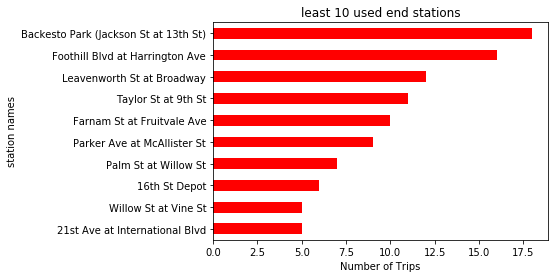

In [22]:
#plot  a horizontal bar chart to visualize the 10 least used stations
bike.end_station_name.value_counts().nsmallest(10).plot.barh(color='r');
plt.xlabel('Number of Trips')
plt.ylabel('station names')
plt.title('least 10 used end stations');

### 3. Hours, day, monthly distribution of how the bikes were used?

In [27]:
# this will involve the extraction of the hour, day, month of the datetime variable, startdate.
# create a new column for each extract

bike['month'] = bike['start_time'].dt.month_name()
bike['day'] = bike['start_time'].dt.day_name()
bike['hour'] = bike['start_time'].dt.hour
bike['start_time'].dt.month_name().value_counts()

February    174952
Name: start_time, dtype: int64

In [28]:
#check the values of month,days,hours that was extracted
print(bike.month.value_counts())
print(bike.day.value_counts())
print(bike.hour.value_counts())



February    174952
Name: month, dtype: int64
Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: day, dtype: int64
17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: hour, dtype: int64


There is only one month in the dataset, so no analysis or visualization will be done with the month variable,all days of the weeks are present in the data set, the time from 00:00 hrs to 23:00hrs

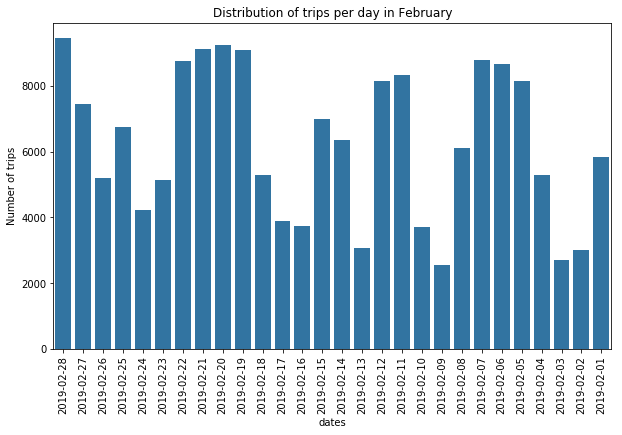

In [29]:
# check the distribution of trips across the days in february by extracting the date only into a new column called dates and plotting a bar chart for each day in february
bike['dates']= bike.start_time.dt.date
plt.figure(figsize=(10,6))
plt.title('Distribution of trips per day in February')
sb.countplot(data=bike, x='dates', color=sb.color_palette()[0])
plt.xticks(rotation=90);
plt.ylabel('Number of trips');


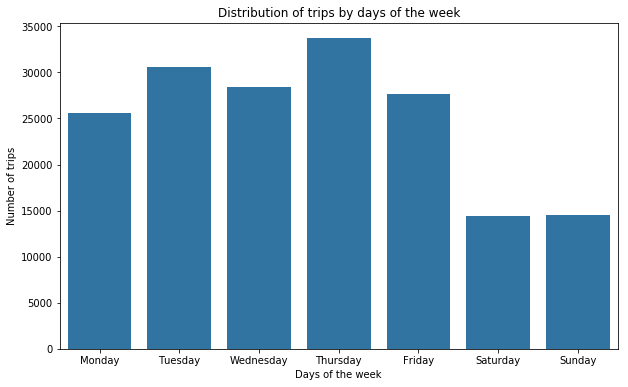

In [30]:
# visualize the distribution of trips per days of the week in the month of february
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
plt.title('Distribution of trips by days of the week')
sb.countplot(data=bike, x='day', order=day_name, color=sb.color_palette()[0]);
plt.ylabel('Number of trips')
plt.xlabel('Days of the week');

It can be seen from the bar chart above that the weekends had least amount of trips. This is logical as weekends are mostly off days

Text(0.5,0,'Time of the day')

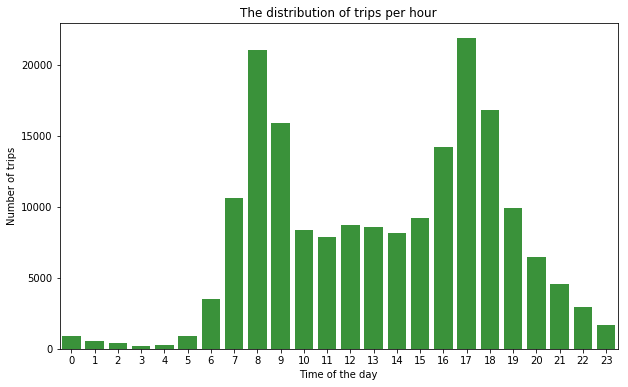

In [55]:
#  check the distribution of trips per hour from 00:00 to 23:00hrs
plt.figure(figsize=(10,6))
sb.countplot(data=bike, x='hour', color=sb.color_palette()[2]);
plt.title('The distribution of trips per hour')
plt.ylabel('Number of trips')
plt.xlabel('Time of the day');



There are two times of the day, 8am and 5pm, where the number of trips is the highest. This corresponds to the peak hours(resumption and closing time of businesses).This gives an idea that a lot of these users might be within the working age group. This can be confirmed when an age analysis is done.

### 4. What is the gender distribution of this data sets in terms of number of trips by gender?

In [60]:
# using value counts and expressing in percentage
(bike.member_gender.dropna().value_counts()/bike.member_gender.value_counts().sum())*100

Male      74.595054
Female    23.319840
Other      2.085106
Name: member_gender, dtype: float64

from the numbers above, we can say 3/4 of the trips were done by males. A pie chart make this discovery very easy to see

Text(0,0.5,'')

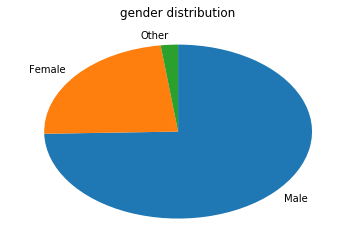

In [63]:
#pie chart
bike.member_gender.dropna().value_counts().plot.pie(startangle = 90, counterclock = False);
plt.title('gender distribution')
plt.ylabel('')

Males carried out triple of the number of trips carried out by the females and other gender.

### 5. The distribution ofthe number of Trips carried based on user type?

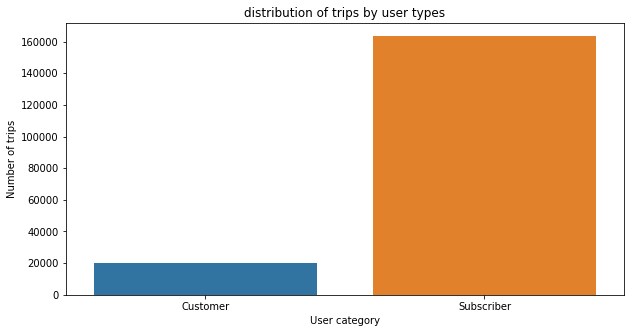

In [64]:
# check the distribution of the type of users
plt.figure(figsize=[10,5])
sb.countplot(data=bike, x='user_type')
plt.ylabel('Number of trips')
plt.xlabel('User category')
plt.title('distribution of trips by user types');

subscribers used the bike service overwhemingly more than customers

### 6. The age distribution of users of the go bike ride system?

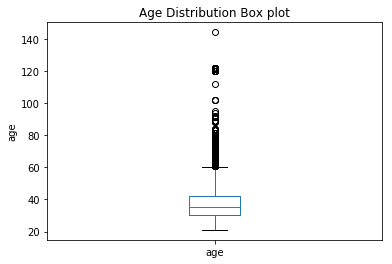

In [67]:
bike.age.plot.box();
plt.title('Age Distribution Box plot')
plt.ylabel("age");



From the boxplot, there are no users less than 20 years, the median age of users is around 37years, with majority of the users between the age of 20-60 years.

To put the age into more perspective,we divide ages into young adults(15-24),adults(25-64),seniors(65 and above). This will be done suing the bin function

In [41]:
bin_edges= [14,24,64,bike.age.max()]

In [42]:
bin_names = ['Young Adults','Adults','Seniors']

In [43]:
bike['age_category']= pd.cut(bike.age, bin_edges, labels=bin_names)

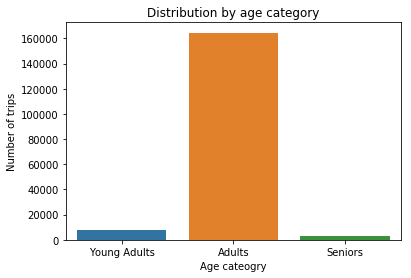

In [44]:
sb.countplot(data=bike, x='age_category');
plt.title('Distribution by age category')
plt.ylabel('Number of trips')
plt.xlabel('Age cateogry');


From the chart above, it can be seen that people btween the ages of 25-64 used the bike system the most, with very few seniors and young adults. this further corroborates the time distribution which seem to suggegst the users are working population or people involved in business

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
    1.The feature of interest was the trip duration, the data was skewed to the right, with outliers of > 2000 secs. this Necessitated transforming to a log scale where we have found that the majority trips were under 2000 secs which is about half an hour.
    2. some of the variables, gave an insight as to the type of people who use the bike to be working population(24-64)years, such as 2 peak timings(8am and 5pm), the least days of bike usage were the weekends.
    3.Regarding the users, we have found that the males are almost 3 times the female users
    4.Subscribers use the bike ride system more than the customers with an overwhelming ratio

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

    1. some data types such as start_date, end_date were in the wrong data types which was promptly converted to appropriate data types
    2. To be able to do analysis of the hours , days of the week variations in number of trips, extra(day,hours) columns were created and filled by extracting their values from the start_time column
    3. to get the age distribution, a new column was created and filled by subtracting the date of birth from 2022.
    4. the age was divided in to categories with the bin function, to provide more context to the ages
    

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [35]:
# several variables will be checked against duration of trips, so we create a function that takes a X-value which is the name of the variable and returns a barplot showing the variable variation with duration of trip
def chart(x_value):
    plt.figure(figsize = [8, 5])
    base_color = sb.color_palette()[1]
    sb.barplot(data = bike, x = x_value, y = 'duration_sec', color = base_color);
    plt.ylabel('Duration in secs(s)');
    
    
    

### 1. whats the average duration of trips carried out by each gender

In [36]:
bike.groupby(['member_gender']).mean()

,duration_sec,member_birth_year,bike_share_for_all_trip,age,hour
member_gender,,,,,
Female,778.872761,1985.776302,0.088077,36.223698,13.216076
Male,672.394851,1984.546383,0.100414,37.453617,13.525172
Other,997.328489,1983.102002,0.177680,38.897998,13.673156


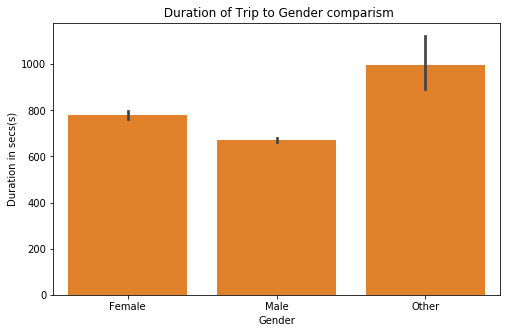

In [38]:
#call the function chart() and pass in an X-value of 'member_gender'
chart('member_gender')
plt.title(" Duration of Trip to Gender comparism")
plt.xlabel('Gender');


Although, the males trippled the number of bike rides of the females, averagely the durations of their rides lasted the least.

### 2. how long does each of the age category use the ride for?.

Text(0.5,0,'User Type')

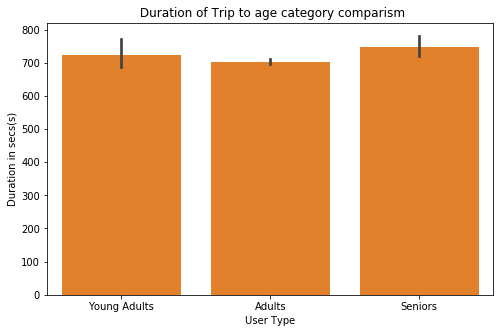

In [45]:
#call the function chart() and pass in an X-value of 'age_category'
chart('age_category')
plt.title(" Duration of Trip to age category comparism")
plt.xlabel('User Type')


As adults use the bike rides most, their average length of ride is not significantly different from the few adults and seniors who eventually use the ride

In [78]:
## 3. Does the length of ride vary with the type of User?

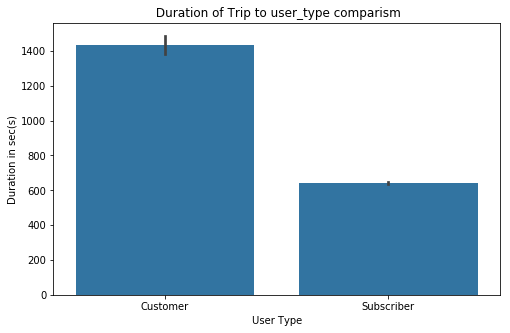

In [80]:

chart("user_type")
plt.title(" Duration of Trip to user_type comparism")
plt.xlabel('User Type')
plt.ylabel('Duration in sec(s)');


Even though the subscribers use the bike rides more, the customers use the bike for more durations compared to the subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> i have checked all the variables against the duration, there is no relationship between the ages of the users and the duration of their trips.so it means probably, those seniors and adults who are are not using the rides are doing that for another reason and not duartion of cycling.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the large number of males who used the bikes would make one assume strength to cyclce is a factor here, but the feamles who cycle have the endurance to cycle for longer

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 1. check the relationship between age,user_type and duration.

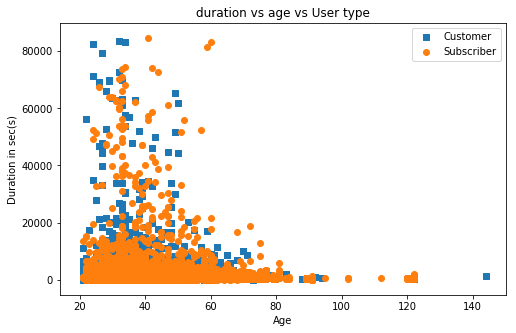

In [96]:
user_markers = [['Customer', 's'],['Subscriber', 'o']]
plt.figure(figsize=[8,5])
for user, marker in user_markers:
    df_user = bike[bike['user_type'] == user]
    plt.scatter((2022 - df_user['member_birth_year']), df_user['duration_sec'], marker = marker)
plt.legend(['Customer','Subscriber'])
plt.title('duration vs age vs User type')
plt.xlabel('Age')
plt.ylabel('Duration in sec(s)');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It can be seen that majority of the users were between ages 20-40 years and a lot of them used the bike for less than 2000 seconds with subscribers more than customers.

### Were there any interesting or surprising interactions between features?

> subscribers are older people compared to customers.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [81]:
bike.to_csv('bikeanalysed.csv', index=None)
bikes = pd.read_csv('bikeanalysed.csv')